In [1]:
try:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    print("Libraries Imported")
except Exception as e:
    print(f"Importing error: {e}")

Libraries Imported


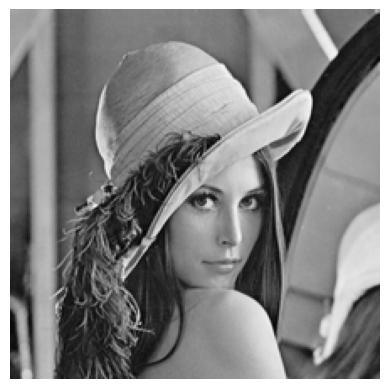

In [2]:
lenna_img = cv2.imread("../images/lenna.png")
lenna_img_gray = cv2.cvtColor(lenna_img, cv2.COLOR_BGR2GRAY)

plt.imshow(lenna_img_gray, cmap="gray")  # cmap's features = gray, viridis, jet, rainbow
plt.axis("off")
plt.show()

# Box Filter

In [3]:
blurred1 = cv2.boxFilter(
    lenna_img_gray, -1, ksize=(5, 5)
)  # ksize => kernel size = (width, height) ex. (5, 5) representation 5x5 box filter, it calculates the average value between each pixel and the surrounding 5x5 pixels.
blurred2 = cv2.boxFilter(lenna_img_gray, -1, (9, 9))
blurred3 = cv2.boxFilter(lenna_img_gray, -1, (20, 20))
blurred4 = cv2.boxFilter(lenna_img_gray, -1, (1, 1))


cv2.imshow("1", blurred1)
cv2.imshow("2", blurred2)
cv2.imshow("3", blurred3)
cv2.imshow("4", blurred4)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Custom Box Filter

Text(0.5, 1.0, 'Sobel Vertical')

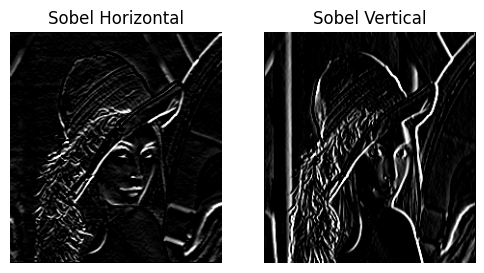

In [4]:
"""
Sobel vorizontal edge
"""
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
filtered_lena_horizontal = cv2.filter2D(lenna_img_gray, -1, sobel_horizontal)

sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)

filtered_lena_vertical = cv2.filter2D(lenna_img_gray, -1, sobel_vertical)


fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(filtered_lena_horizontal, cmap="gray")
axes[0].set_aspect("auto")
axes[0].axis("off")
axes[0].set_title("Sobel Horizontal")

axes[1].imshow(filtered_lena_vertical, cmap="gray")
axes[1].set_aspect("auto")
axes[1].axis("off")
axes[1].set_title("Sobel Vertical")

Text(0.5, 1.0, 'Original')

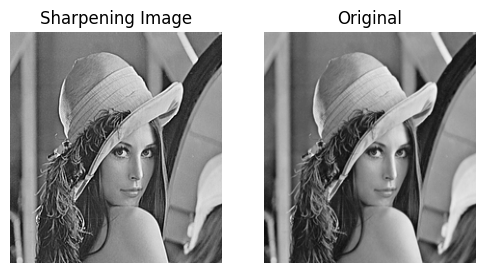

In [5]:
"""
Sharpening filter
"""
sharpening_ksize = np.array(
    [[0, 0, 0], [0, 2, 0], [0, 0, 0]] - (1 / 9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    dtype=np.float32,
)

filtered_lena_img_sharpening = cv2.filter2D(lenna_img_gray, -1, sharpening_ksize)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(filtered_lena_img_sharpening, cmap="gray")
axes[0].set_aspect("auto")
axes[0].axis("off")
axes[0].set_title("Sharpening Image")

axes[1].imshow(lenna_img_gray, cmap="gray")
axes[1].set_aspect("auto")
axes[1].axis("off")
axes[1].set_title("Original")

# Gaussian Filter

Text(0.5, 1.0, 'Gaussian Filter Image')

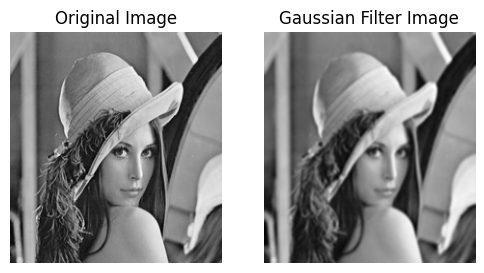

In [6]:
ksize = (5, 5)  # not-even dimension
gaussian_lenna_img = cv2.GaussianBlur(src=lenna_img_gray, ksize=ksize, sigmaX=0)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# İlk görüntüyü çizin
axes[0].imshow(lenna_img_gray, cmap="gray")
axes[0].set_aspect("auto")
axes[0].axis("off")
axes[0].set_title("Original Image")

# İkinci görüntüyü çizin
axes[1].imshow(gaussian_lenna_img, cmap="gray")
axes[1].set_aspect("auto")
axes[1].axis("off")
axes[1].set_title("Gaussian Filter Image")

## Separable Gaussian Filter

Text(0.5, 1.0, 'Separable Gaussian Filtered Image')

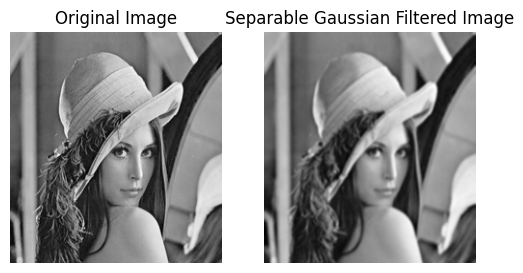

In [7]:
ksize = 5
sigma = 1.0

kernelX = cv2.getGaussianKernel(ksize, sigma)
kernelY = kernelX.T

separable_gaussian_lenna_img = cv2.sepFilter2D(lenna_img_gray, -1, kernelX, kernelY)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# İlk görüntüyü çizin
axes[0].imshow(lenna_img_gray, cmap="gray")
axes[0].set_aspect("auto")
axes[0].axis("off")
axes[0].set_title("Original Image")

# İkinci görüntüyü çizin
axes[1].imshow(separable_gaussian_lenna_img, cmap="gray")
axes[1].set_aspect("auto")
axes[1].axis("off")
axes[1].set_title("Separable Gaussian Filtered Image")

# Comparison: salt and pepper noise
- Mean
- Gaussian
- Median

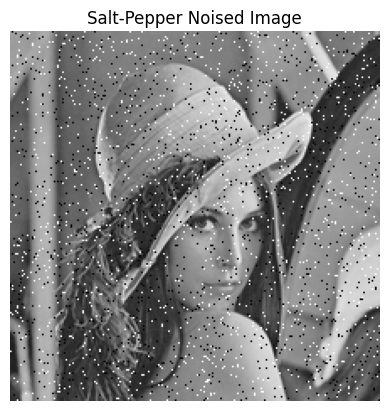

In [8]:
"""
Add salt-pepper noise to image
"""
noise_ratio = 0.05

h, w, _ = lenna_img.shape

noisy_image = lenna_img_gray.copy()
noisy_image_pixels = int(noise_ratio * (h * w))

for _ in range(noisy_image_pixels):
    x, y = np.random.randint(0, w), np.random.randint(0, h)
    noisy_image[x, y] = 0 if np.random.rand() < 0.5 else 255

plt.imshow(noisy_image, cmap="gray")
plt.title("Salt-Pepper Noised Image")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Median Filter 7')

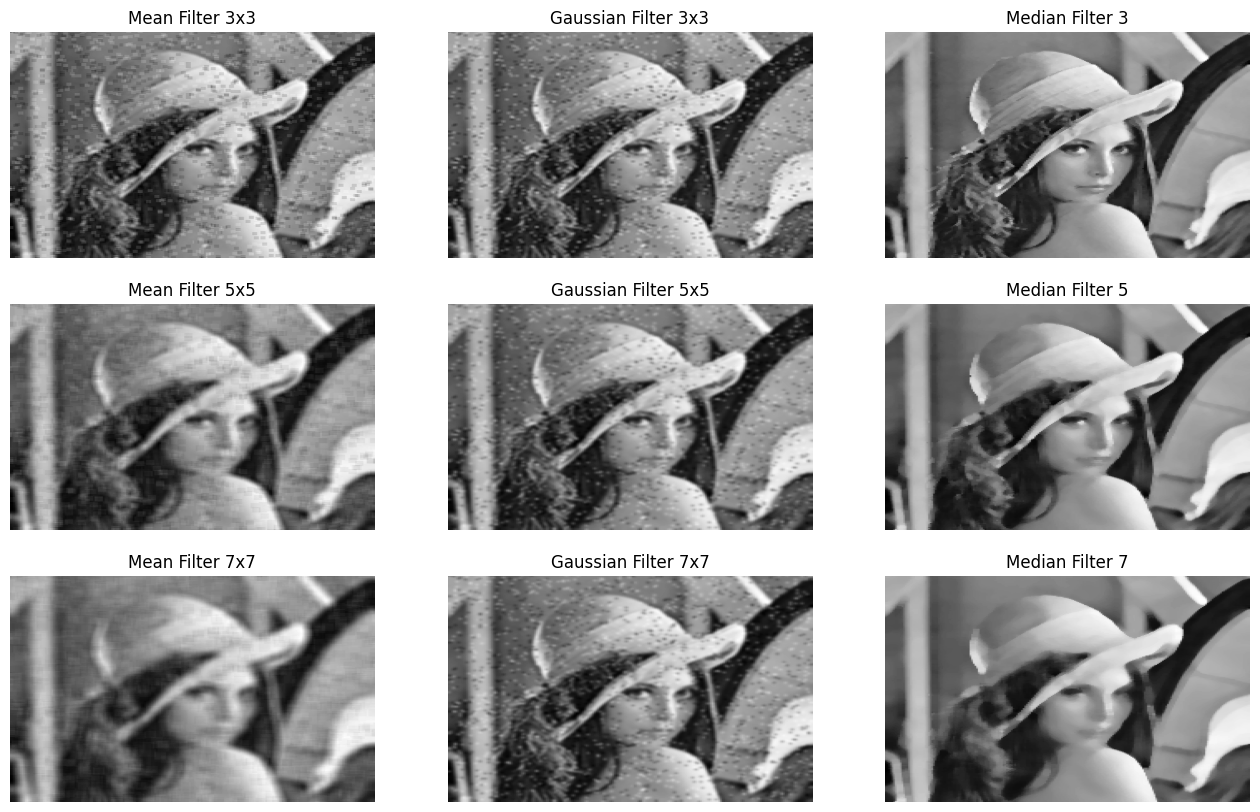

In [9]:
ksize3 = (3, 3)
ksize5 = (5, 5)
ksize7 = (7, 7)
sigma = 1

"""
Mean Filter ksize = (3, 3), (5, 5), (7, 7)
"""
mean_filtered_lenna_img_3 = cv2.blur(noisy_image, ksize3)
mean_filtered_lenna_img_5 = cv2.blur(noisy_image, ksize5)
mean_filtered_lenna_img_7 = cv2.blur(noisy_image, ksize7)


"""
Gaussian Filter ksize = (3, 3), (5, 5), (7, 7)
"""
gaussian_filtered_lenna_img_3 = cv2.GaussianBlur(noisy_image, ksize3, sigma)
gaussian_filtered_lenna_img_5 = cv2.GaussianBlur(noisy_image, ksize5, sigma)
gaussian_filtered_lenna_img_7 = cv2.GaussianBlur(noisy_image, ksize7, sigma)

"""
Median Filter ksize = (3, 3), (5, 5), (7, 7)
"""
median_filtered_lenna_img_3 = cv2.medianBlur(noisy_image, 3)
median_filtered_lenna_img_5 = cv2.medianBlur(noisy_image, 5)
median_filtered_lenna_img_7 = cv2.medianBlur(noisy_image, 7)

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

# Show Mean Filter
axes[0][0].imshow(mean_filtered_lenna_img_3, cmap="gray")
axes[0][0].set_aspect("auto")
axes[0][0].axis("off")
axes[0][0].set_title("Mean Filter 3x3")

axes[1][0].imshow(mean_filtered_lenna_img_5, cmap="gray")
axes[1][0].set_aspect("auto")
axes[1][0].axis("off")
axes[1][0].set_title("Mean Filter 5x5")

axes[2][0].imshow(mean_filtered_lenna_img_7, cmap="gray")
axes[2][0].set_aspect("auto")
axes[2][0].axis("off")
axes[2][0].set_title("Mean Filter 7x7")

# Show Gaussian Filter
axes[0][1].imshow(gaussian_filtered_lenna_img_3, cmap="gray")
axes[0][1].set_aspect("auto")
axes[0][1].axis("off")
axes[0][1].set_title("Gaussian Filter 3x3")

axes[1][1].imshow(gaussian_filtered_lenna_img_5, cmap="gray")
axes[1][1].set_aspect("auto")
axes[1][1].axis("off")
axes[1][1].set_title("Gaussian Filter 5x5")

axes[2][1].imshow(gaussian_filtered_lenna_img_7, cmap="gray")
axes[2][1].set_aspect("auto")
axes[2][1].axis("off")
axes[2][1].set_title("Gaussian Filter 7x7")

# Median Filter
axes[0][2].imshow(median_filtered_lenna_img_3, cmap="gray")
axes[0][2].set_aspect("auto")
axes[0][2].axis("off")
axes[0][2].set_title("Median Filter 3")

axes[1][2].imshow(median_filtered_lenna_img_5, cmap="gray")
axes[1][2].set_aspect("auto")
axes[1][2].axis("off")
axes[1][2].set_title("Median Filter 5")

axes[2][2].imshow(median_filtered_lenna_img_7, cmap="gray")
axes[2][2].set_aspect("auto")
axes[2][2].axis("off")
axes[2][2].set_title("Median Filter 7")